# Lab 06 - PAM Receiver with Matched Filter and Symbol Timing Extraction

### Maurice Woods

### 14 March 2017


------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
## EC 01 - LPF with Trapezoidal Frequency Response

In [ ]:
from pylab import *
import ecen4652 as ecen
import quick
import filtfun
import filtspecs
import showfun

##### Part A)

Make a Python module called "filtfun" and start the module with a function called "trapfilt()". This fucuntion should generate a truncated version hT(t) of the impulse response given above and use it to filter an input signal x(t) and produce a delay-compensated output signal y(t).

> Answer

##### Part B)

To test trapfilt, let Fs=16000 Hz, use a time axis from -0.5 to 0.5 sec, and generate a unit impulse at t = 0.

> Answer

In [ ]:
Fs=16000
t0=-0.5
t=1
xt=concatenate([zeros(int(Fs/2)),[1],zeros(Fs-int(Fs/2))])

sig_xt=ecen.sigWave(xt, Fs, t0)
fL=1000
k=20
alfa=0.2

[trap_xt,n]=filtfun.trapfilt0(sig_xt,fL,k,alfa)
showfun.showft(trap_xt,[-3000,3000,0])
showfun.showft(trap_xt,[-3000,3000,-60])

##### Part C)

Look at the PSD of this signal and then use trapfilt to lowpass filter the signal with fL ≈ 1000 Hz, k ≈ 10, and α ≈ 0.2. Determine the baud rate FB (look at the PSD of the lowpass filtered signal squared), and then use this information to display the eye diagram (use a width of 3TB and superimpose about 100 traces) of the lowpass filtered PAM signal. Change fL to find the value that gives you the largest eye opening. How is this fL related to FB?

> Answer

In [ ]:
import wavfun
[seq, framerate] = wavfun.wavread("pamsig601.wav")
tt=quick.quicktt(seq,framerate)
quick.quickplot(tt[0:200],seq[0:200])

sig_xt = ecen.sigWave(seq, framerate)
showfun.showpsd1(sig_xt,[-1000, 1000, 0],framerate) #Plot S_x(f)

In [ ]:
fL=1000
k=10
alfa=0.2
[trap_xt,n]=filtfun.trapfilt0(sig_xt,fL,k,alfa)
trap_xt_sqrd = trap_xt.copy()

trap_xt_sqrd.sig = trap_xt_sqrd.sig**2
showfun.showpsd1(trap_xt_sqrd,[-1000, 1000, 0],framerate) #Plot S_x(f)

In [ ]:
showfun.showpsd1(trap_xt_sqrd,[810, 820, 0],framerate) #Plot S_x(f)

In [ ]:
NTd=100
L=2
dly=0.5
FB=815
showfun.showeye(trap_xt, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

##### Part D)

Start a new Python module filtspecs.py with a function called _trapfilt_taps_ that computes the taps for a FIR LPF with trapezoidal frequency response. Place the filtspecs.py module in one of the directories in your PYTHONPATH and generate a GNU Radio flowgraph that can be used to test the _trapfilt_ taps in a decimating or interpolating FIR filter block. Describe your measurement procedure and how the results that you measured verify the correct implementation of the LPF with a trapezoidal frequency response in GNU Radio.

> Answer

## EC 02 - PAM Transmitter/Receiver

In [1]:
from pylab import *
import ecen4652 as ecen
import quick
from ascfun import asc2bin
import pamfun

##### Part A)

Update your pam11 function to include the RRCf (root raised cosine in frequency) pulse called pam12

> Answer

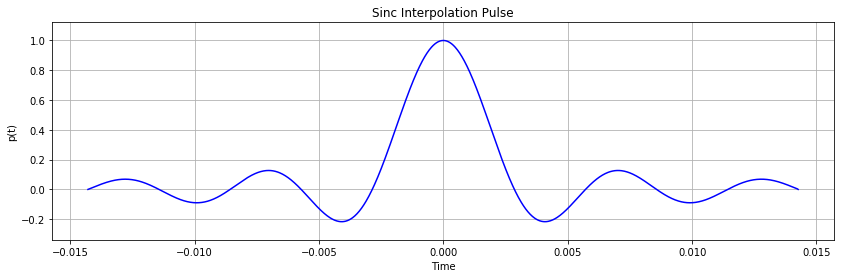

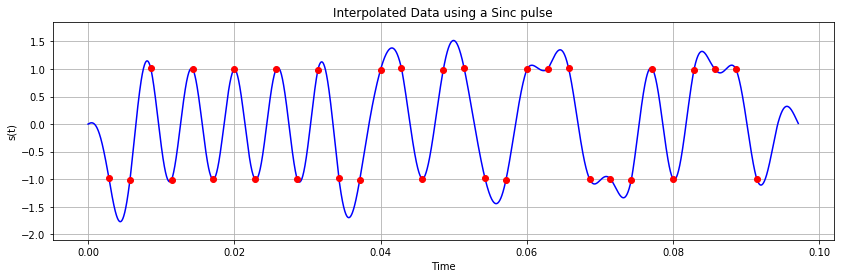

In [3]:
Fb = 350 # Baud rate (bits/sec)
Fs = 44100 # Sampling frequency (samples/sec)

string="Test"
dn = asc2bin(string,8)
dn = multiply(dn,2)-1

sig_pt = ecen.sigSequ(dn,Fb)

pam_pt = pamfun.pam12(sig_pt,Fs,'sinc',[5,0.4])

##### Part B)

For the module pamfun.py, write a Python function called pamrcvr10 (PAM receiver V1.0) which implements a receiver, with matched filter and sampler, for (noisy) PAM signals.

> Answer

##### Part C)

Use showpsd in combination with trapfilt and time domain plots to analyze the PAM signals sufficiently so that you can use your pamrcvr10 function to recover the ASCII text in each case.

> Answer

##### Part D)

Question

> Answer

##### Part E)

Question

> Answer

##### Part F)

Question

> Answer